# CREDIT CARD DEFAULT

Group Members - Khushi Ostwal, Krisha Desai, Mrudav Mehta, Rohan Nair

<b>Problem Statement - Predicting the possibility of a customer defaulting their credit card bill<b>

<b>Problem Description</b> - The goal of this research is to foresee consumer payment defaults in Taiwan. In terms of risk management, the predictive accuracy of the predicted default likelihood will yield more valuable results than the classification of clients as either credible or not credible, which yields a binary outcome.<br><br>
<b>Objective</b> - Predicting which consumer would default in the following months is the goal of our project.<br><br>
<i>All of us are familiar with credit cards. Charges are charged against a line of credit rather than the account holder's cash deposits when using this sort of payment card. When someone makes a purchase using a credit card, a debt is accumulated on their account that has to be paid off each month.<br>

When you have fallen far behind on your credit card payments, you enter credit card default.<br>

One or two missed credit card payments do not constitute a default. When you repeatedly fail to pay the minimum amount due on your credit card, it becomes a payment default.<br></i>

Source of data - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

<b>Importing Libraries</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

<b>Calling the data</b>

In [3]:
cc_df = pd.read_csv('cc_data.csv')
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## <b>Data Description</b>

In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<i>The dataset contains 30,000 rows, and 25 columns. There are no null values</i>

In [5]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<i>This is the data of 30,000 bank customers, and each feature/attribute is explained below:<br>
<ul>
    <li>ID - ID of customer</li>
    <li>LIMIT BAL - Credit in Taiwanese Dollars</li>
    <li>SEX - Sex of customer (1 = male, 2 = female)</li>
    <li>EDUCATION - Education level of customer (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)</li>
    <li>MARRIAGE - Marital status of customer (0 = others, 1 = married, 2 = single, 3 = others)</li>
    <li>AGE - Age of customer in years</li>
    <p>Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)<br><br>All amounts are in Taiwanese Dollars<br><br></p>
    <li>PAY_0 - September repayment status</li>
    <li>PAY_2 - August repayment status</li>
    <li>PAY_3 - July repayment status</li>
    <li>PAY_4 - June repayment status</li>
    <li>PAY_5 - May repayment status</li>
    <li>PAY_6 - April repayment status</li>
    <li>BILL_AMT1 - Amount due in September</li>
    <li>BILL_AMT2 - Amount due in August</li>
    <li>BILL_AMT3 - Amount due in July</li>
    <li>BILL_AMT4 - Amount due in June</li>
    <li>BILL_AMT5 - Amount due in May</li>
    <li>BILL_AMT6 - Amount due in April</li>
    <li>PAY_AMT1 - Amount of previous payment made in September</li>
    <li>PAY_AMT2 - Amount of previous payment made in August</li>
    <li>PAY_AMT3 - Amount of previous payment made in July</li>
    <li>PAY_AMT4 - Amount of previous payment made in June</li>
    <li>PAY_AMT5 - Amount of previous payment made in May</li>
    <li>PAY_AMT6 - Amount of previous payment made in April</li>
    <li>default payment next month - (1 = customer defaulted in the next month, 0 = customer didn't default)</li>
</ul>
</i>

## Exploratory Data Analysis

For the ease of coding, we are renaming the target variable 

In [6]:
cc_df['willdefault'] =cc_df ['default payment next month']
cc_df.drop('default payment next month',axis = 1,inplace=True)
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,willdefault
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<AxesSubplot:xlabel='willdefault', ylabel='count'>

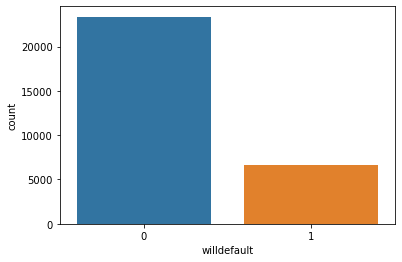

In [7]:
sns.countplot(x = 'willdefault', data = cc_df)

As we can see, a considerably lesser number of people have defaulted and hence, we can conclude that the dataset is imbalanced<br><br>Now let's take a look at the categorical features

In [8]:
cc_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
cc_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [10]:
cc_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Education and Marriage contain values that do not belong to any pre-defined description, hence we combine them to others

In [11]:
combiner = (cc_df['EDUCATION'] == 5) | (cc_df['EDUCATION'] == 6) | (cc_df['EDUCATION'] == 0)
cc_df.loc[combiner, 'EDUCATION'] = 4
cc_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [12]:
combiner = cc_df['MARRIAGE'] == 0
cc_df.loc[combiner, 'MARRIAGE'] = 3
cc_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Now that the categorical data is cleaned, we can plot it to get a visual understanding of our data

In [13]:
catg_data = ['SEX', 'EDUCATION', 'MARRIAGE']

In [14]:
cc_df_cat = cc_df[catg_data]
cc_df_cat['default'] = cc_df['willdefault']

In [15]:
cc_df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 720x360 with 0 Axes>

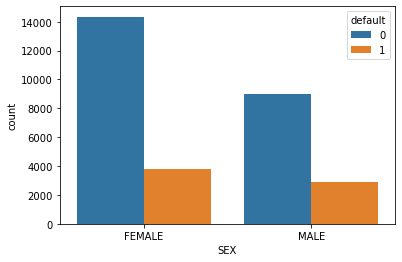

<Figure size 720x360 with 0 Axes>

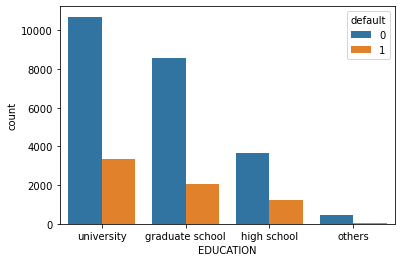

<Figure size 720x360 with 0 Axes>

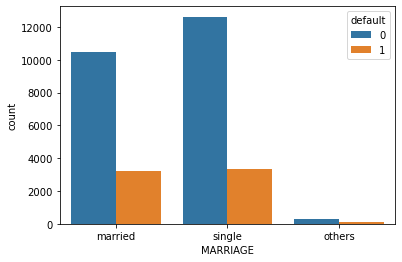

In [16]:
for col in catg_data:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=1)
    sns.countplot(x = col, hue = 'default', data = cc_df_cat)

General observations based on the above graphs:
    <ul>
        <li>There are more women than men, and the proportion of female defaulters is higher
        <li>The most educated people make the most defaults
        <li>Single people are more bound to default
    </ul>
        

<AxesSubplot:xlabel='willdefault', ylabel='LIMIT_BAL'>

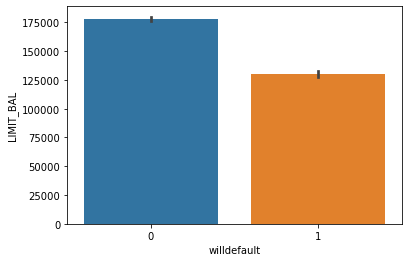

In [19]:
sns.barplot(x='willdefault', y='LIMIT_BAL', data=cc_df)

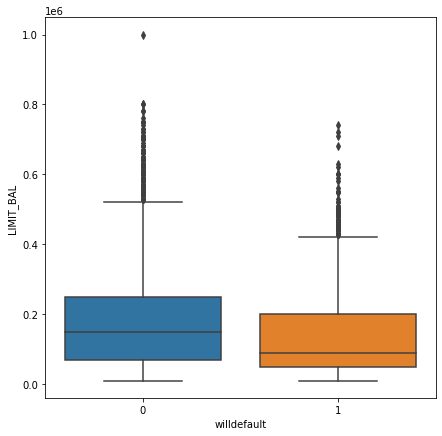

In [17]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(x="willdefault", y="LIMIT_BAL", data=cc_df)

Renaming the payment columns for ease in understanding

In [18]:
cc_df.rename(columns={'PAY_0':'sept_pay','PAY_2':'aug_pay','PAY_3':'jul_pay','PAY_4':'jun_pay','PAY_5':'may_pay','PAY_6':'apr_pay'},inplace=True)
cc_df.rename(columns={'BILL_AMT1':'sept_bill_amt','BILL_AMT2':'aug_bill_amt','BILL_AMT3':'jul_bill_amt','BILL_AMT4':'jun_bill_amt','BILL_AMT5':'may_bill_amt','BILL_AMT6':'apr_bill_amt'}, inplace = True)
cc_df.rename(columns={'PAY_AMT1':'sept_pay_amt','PAY_AMT2':'aug_pay_amt','PAY_AMT3':'jul_pay_amt','PAY_AMT4':'jun_pay_amt','PAY_AMT5':'may_pay_amt','PAY_AMT6':'apr_pay_amt'},inplace=True)

In [19]:
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_pay,aug_pay,jul_pay,jun_pay,...,jun_bill_amt,may_bill_amt,apr_bill_amt,sept_pay_amt,aug_pay_amt,jul_pay_amt,jun_pay_amt,may_pay_amt,apr_pay_amt,willdefault
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Ensuring Age is int datatype

In [20]:
cc_df['AGE']=cc_df['AGE'].astype('int')

<AxesSubplot:xlabel='index', ylabel='AGE'>

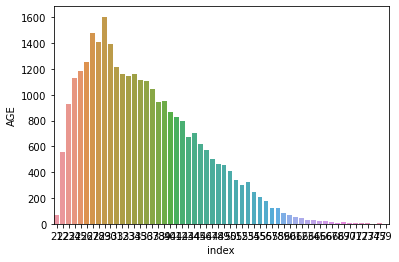

In [21]:
age_cc_df=cc_df['AGE'].value_counts().reset_index()
#cc_df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=age_cc_df)

In [22]:
pay_amnt_cc_df = cc_df[['sept_pay_amt','aug_pay_amt','jul_pay_amt','jun_pay_amt','may_pay_amt','apr_pay_amt', 'willdefault']]

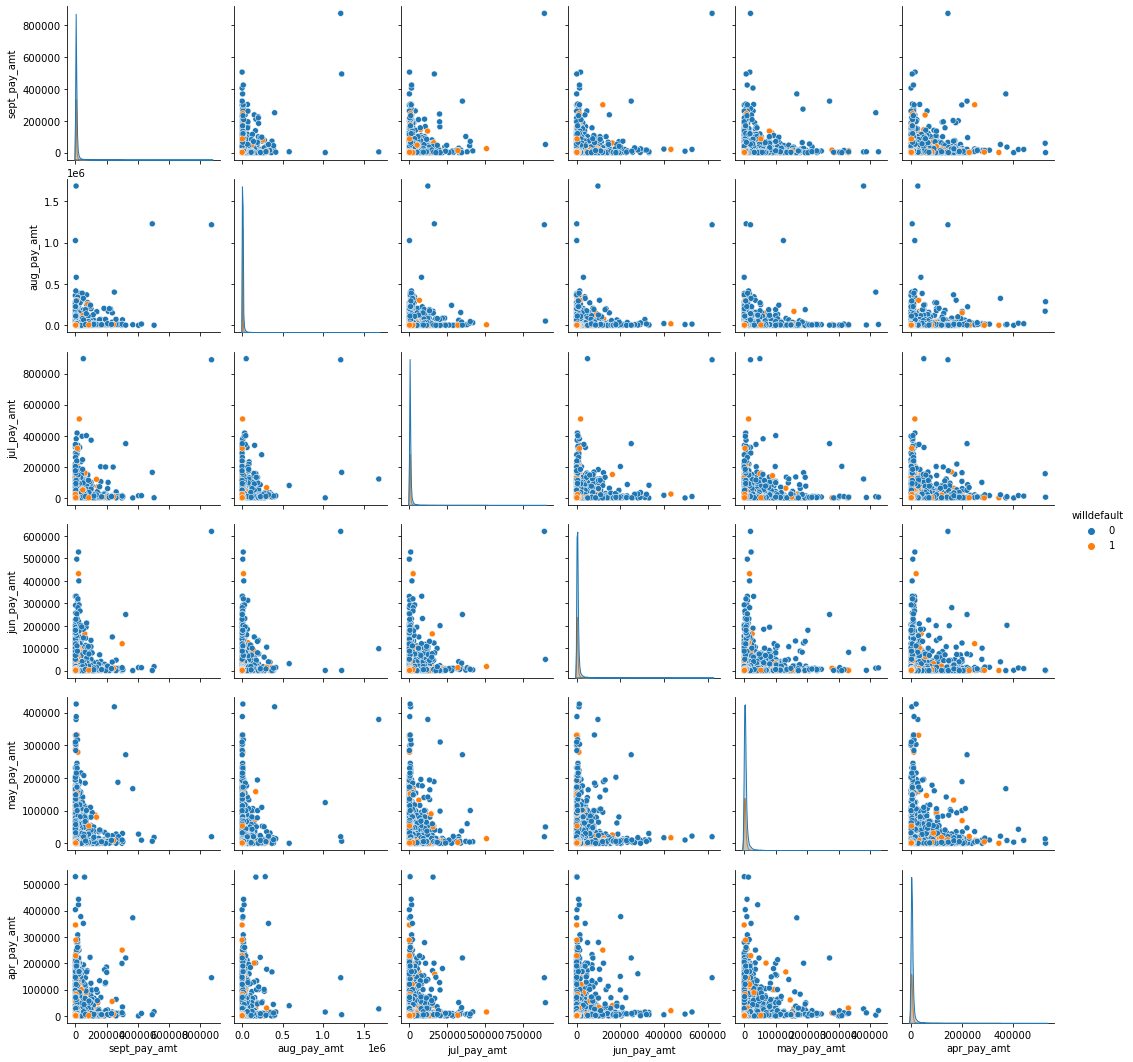

In [23]:
sns.pairplot(data = pay_amnt_cc_df, hue='willdefault')

## Feature Engineering

In [24]:
cc_update = cc_df.copy()

In [25]:
cc_update['Payement_Value'] = cc_update['sept_pay'] + cc_update['aug_pay'] + cc_update['jul_pay'] + cc_update['jun_pay'] + cc_update['may_pay'] + cc_update['apr_pay']

In [26]:
cc_update.groupby('willdefault')['Payement_Value'].mean()

willdefault
0   -1.980140
1    2.023056
Name: Payement_Value, dtype: float64

<AxesSubplot:xlabel='willdefault', ylabel='Payement_Value'>

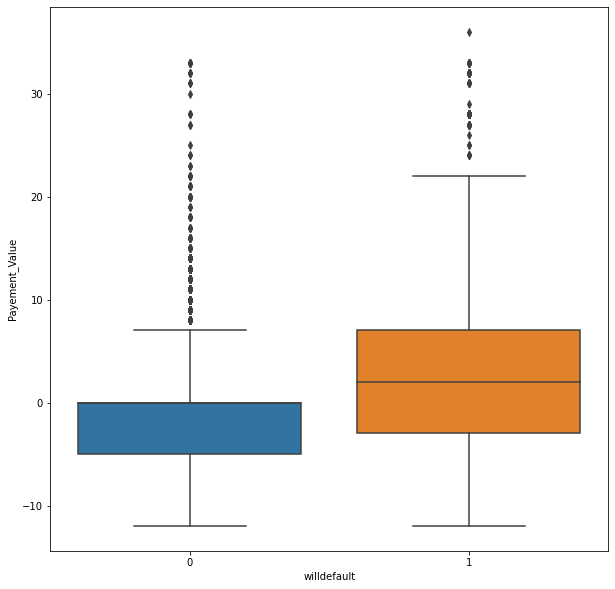

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data = cc_update, x = 'willdefault', y = 'Payement_Value' )

In [28]:
cc_update['Dues'] = (cc_update['apr_bill_amt']+cc_update['may_bill_amt']+cc_update['jun_bill_amt']+cc_update['jul_bill_amt']+cc_update['sept_bill_amt'])-(cc_update['apr_pay_amt']+cc_update['may_pay_amt']+cc_update['jun_pay_amt']+cc_update['jul_pay_amt']+cc_update['aug_pay_amt']+cc_update['sept_pay_amt'])

In [29]:
cc_update.groupby('willdefault')['Dues'].mean()

willdefault
0    187742.051532
1    193570.044002
Name: Dues, dtype: float64

In [30]:
cc_update['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [31]:
cc_update['EDUCATION']=np.where(cc_update['EDUCATION'] == 6, 4, cc_update['EDUCATION'])
cc_update['EDUCATION']=np.where(cc_update['EDUCATION'] == 0, 4, cc_update['EDUCATION'])

In [32]:
cc_update['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [33]:
cc_update['MARRIAGE']=np.where(cc_update['MARRIAGE'] == 0, 3, cc_update['MARRIAGE'])

In [34]:
cc_update.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [35]:
cc_update.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_pay,aug_pay,jul_pay,jun_pay,...,apr_bill_amt,sept_pay_amt,aug_pay_amt,jul_pay_amt,jun_pay_amt,may_pay_amt,apr_pay_amt,willdefault,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


## One Hot Encoding

In [36]:
cc_update = pd.get_dummies(cc_update,columns=['EDUCATION','MARRIAGE'])

In [37]:
cc_update.head()

,ID,LIMIT_BAL,SEX,AGE,sept_pay,aug_pay,jul_pay,jun_pay,may_pay,apr_pay,...,willdefault,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,10352,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,76608,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,174713,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,44620,0,0,0,1,1,0,0


In [38]:
cc_update.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [39]:
cc_update = pd.get_dummies(cc_update, columns = ['sept_pay','aug_pay','jul_pay','jun_pay','may_pay','apr_pay'], drop_first = True )

In [40]:
cc_update.head()

,ID,LIMIT_BAL,SEX,AGE,sept_bill_amt,aug_bill_amt,jul_bill_amt,jun_bill_amt,may_bill_amt,apr_bill_amt,...,may_pay_8,apr_pay_-1,apr_pay_0,apr_pay_2,apr_pay_3,apr_pay_4,apr_pay_5,apr_pay_6,apr_pay_7,apr_pay_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


In [41]:
sex_encode={"SEX":{"FEMALE": 0, "MALE": 1}}
cc_update = cc_update.replace(sex_encode)

In [42]:
cc_update.head()

,ID,LIMIT_BAL,SEX,AGE,sept_bill_amt,aug_bill_amt,jul_bill_amt,jun_bill_amt,may_bill_amt,apr_bill_amt,...,may_pay_8,apr_pay_-1,apr_pay_0,apr_pay_2,apr_pay_3,apr_pay_4,apr_pay_5,apr_pay_6,apr_pay_7,apr_pay_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


In [43]:
cc_update.drop('ID',axis = 1, inplace = True)

In [44]:
cc_update.to_csv('Final_cc_df.csv')

In [45]:
cc_update = pd.read_csv('./Final_cc_df.csv')


In [46]:
cc_update.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,sept_bill_amt,aug_bill_amt,jul_bill_amt,jun_bill_amt,may_bill_amt,apr_bill_amt,...,may_pay_8,apr_pay_-1,apr_pay_0,apr_pay_2,apr_pay_3,apr_pay_4,apr_pay_5,apr_pay_6,apr_pay_7,apr_pay_8
0,0,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,2,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,3,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,4,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


In [47]:
cc_update.drop(['Unnamed: 0'],axis = 1, inplace = True)

## Model Building

### Logistic Regression

In [71]:
df_log_reg = cc_update.copy()

In [72]:
df_log_reg.head()

,LIMIT_BAL,SEX,AGE,sept_bill_amt,aug_bill_amt,jul_bill_amt,jun_bill_amt,may_bill_amt,apr_bill_amt,sept_pay_amt,...,may_pay_8,apr_pay_-1,apr_pay_0,apr_pay_2,apr_pay_3,apr_pay_4,apr_pay_5,apr_pay_6,apr_pay_7,apr_pay_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


In [73]:
X = df_log_reg.drop(['willdefault','Payement_Value','Dues'],axis=1)
y = df_log_reg['willdefault']

In [74]:
columns = X.columns

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [77]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [78]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [79]:
optimized_clf = grid_lr_clf.best_estimator_
optimized_clf

LogisticRegression(C=100)

In [80]:
grid_lr_clf.best_params_

{'C': 100, 'penalty': 'l2'}

In [81]:
grid_lr_clf.best_score_

0.8213333333333334

In [188]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [83]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [84]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.8230952380952381
The accuracy on test data is  0.8188888888888889


In [85]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.8188888888888889
The precision on test data is  0.3545956805625314
The recall on test data is  0.6717411988582302
The f1 on test data is  0.46416831032215644
The roc_score on test data is  0.7550428223502373


[[15609   746]
 [ 2969  1676]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

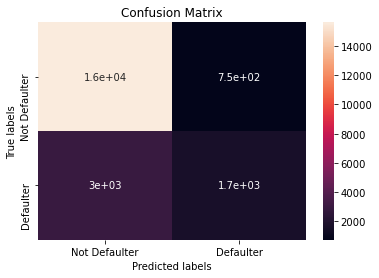

In [86]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [87]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [88]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

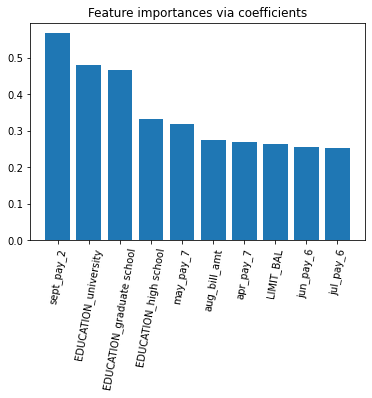

In [89]:

plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [90]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

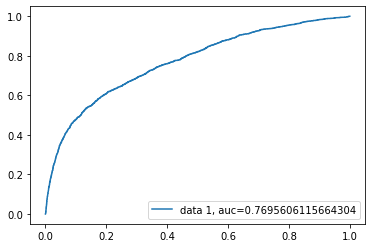

In [92]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing SVC

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [96]:
X = cc_update.drop(['willdefault','Payement_Value','Dues'],axis=1)
y = cc_update['willdefault']

In [97]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [99]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [100]:
optimal_SVC_clf = grid_clf.best_estimator_

In [101]:
grid_clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [102]:
grid_clf.best_score_

0.8223383084577115

In [103]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [104]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.8230952380952381
The accuracy on test data is  0.8188888888888889


In [105]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.8182828282828283
The precision on test data is  0.3552511415525114
The recall on test data is  0.6678111587982832
The f1 on test data is  0.4637853949329359
The roc_score on test data is  0.7530813092216946


[[15000   654]
 [ 2739  1707]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

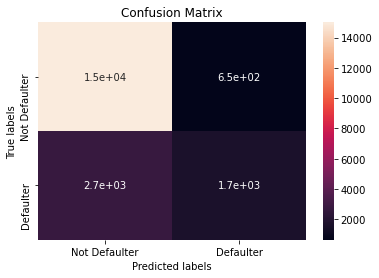

In [106]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [110]:
optimal_SVC_clf

SVC(C=1, probability=True)

In [111]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [112]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

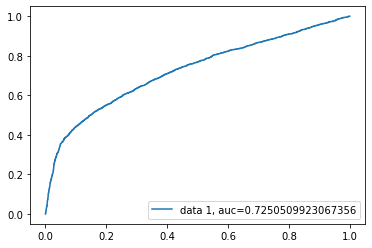

In [113]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree

In [114]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [115]:
from sklearn.tree import DecisionTreeClassifier  

In [117]:
X = cc_update.drop(['willdefault','Payement_Value','Dues'],axis=1)
y = cc_update['willdefault']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [119]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [120]:
grid_DTC_clf.best_score_

0.8145273631840796

In [121]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [122]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [123]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.2}

In [124]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.815820895522388
The accuracy on test data is  0.8127272727272727


## RandomForest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
X = cc_update.drop(['willdefault','Payement_Value','Dues'],axis=1)
y = cc_update['willdefault']

In [128]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [129]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [130]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994029850746269
The accuracy on test data is  0.8147474747474748


In [131]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8147474747474748
The precision on test data is  0.36164383561643837
The recall on test data is  0.6449511400651465
The f1 on test data is  0.46342890579286133
The roc_score on test data is  0.7418713264901378


In [132]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [133]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [134]:
grid_rf_clf.best_score_

0.8210945273631841

In [135]:
grid_rf_clf.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [136]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [137]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [138]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.8514427860696517
The accuracy on test data is  0.8166666666666667


In [139]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8166666666666667
The precision on test data is  0.33881278538812787
The recall on test data is  0.6690712353471596
The f1 on test data is  0.4498332828129737
The roc_score on test data is  0.7521786616958753


In [140]:
len(optimal_rf_clf.feature_importances_)

78

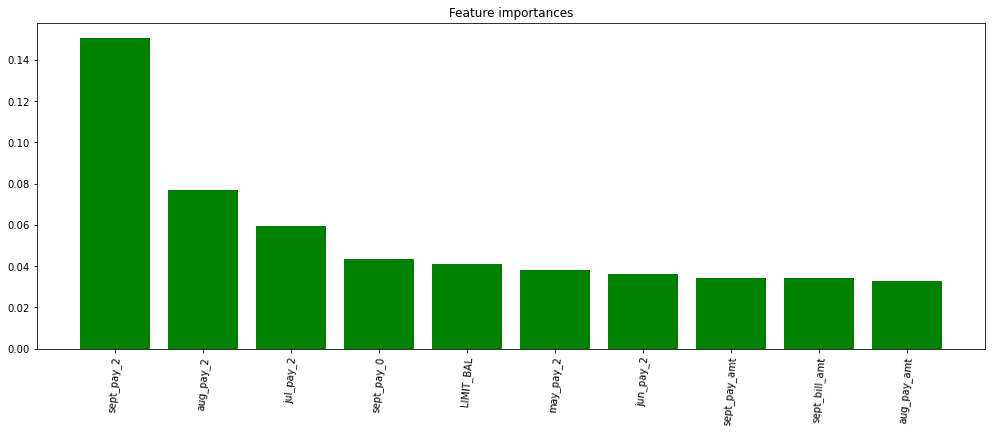

In [141]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [144]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [145]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

In [146]:
import sklearn.metrics as metrics

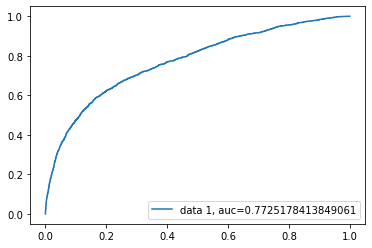

In [147]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## XGBoost 

In [148]:
import xgboost as xgb

In [149]:
#The data is stored in a DMatrix  
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [150]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [151]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[01:37:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [152]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=1, microseconds=357814)

In [153]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [154]:
len(train_class_preds_probs)

20100

In [155]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [156]:
test_class_preds_probs[:20]

array([0.80566674, 0.13779035, 0.18050183, 0.16878456, 0.19320296,
       0.7377946 , 0.16788924, 0.40634117, 0.17819077, 0.8120149 ,
       0.1965852 , 0.25624412, 0.19838573, 0.2345773 , 0.21376377,
       0.23732942, 0.08564341, 0.1032953 , 0.17171647, 0.1168685 ],
      dtype=float32)

In [157]:
test_class_preds[:20]

[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [158]:
len(y_train)

20100

In [159]:
len(train_class_preds)

20100

In [160]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.8465174129353233
The accuracy on test data is  0.8171717171717172


In [161]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.8171717171717172
The precision on test data is  0.3502283105022831
The recall on test data is  0.6646447140381283
The f1 on test data is  0.458732057416268
The roc_score on train data is  0.7509708820590824


# Hyperparameter Tuning

In [162]:
from xgboost import  XGBClassifier

In [164]:
X = cc_update.drop(['willdefault','Payement_Value','Dues'],axis=1)
y = cc_update['willdefault']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [166]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [167]:
gsearch1.best_score_

0.8206467661691542

In [168]:
optimal_xgb = gsearch1.best_estimator_

In [169]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [170]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.8276616915422885
The accuracy on test data is  0.8178787878787879


In [171]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8178787878787879
The precision on test data is  0.3547945205479452
The recall on test data is  0.6658097686375322
The f1 on test data is  0.4629133154602323
The roc_score on train data is  0.7520048499663099


In [172]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
sept_pay_2,0.248537
aug_pay_2,0.176382
jul_pay_2,0.060301
jun_pay_2,0.052636
aug_pay_3,0.050075
may_pay_2,0.042943
sept_pay_1,0.040292
sept_pay_0,0.029801
apr_pay_2,0.027268
jul_pay_-1,0.018259


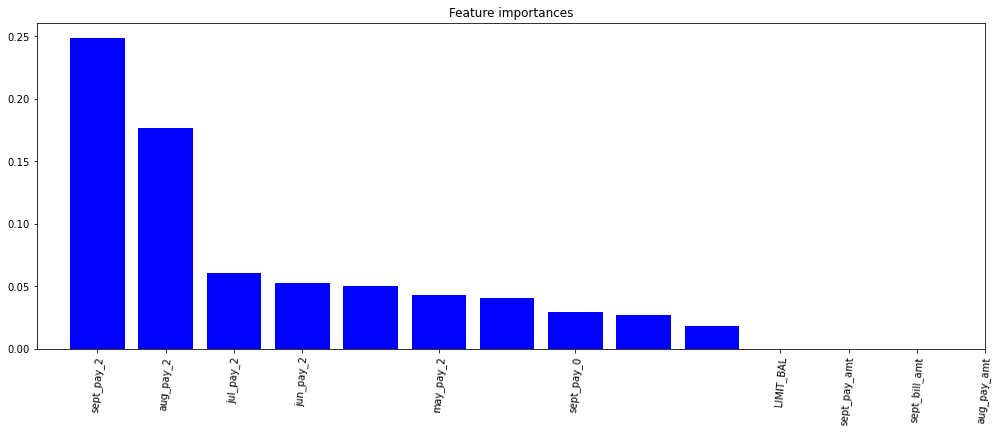

In [173]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [174]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

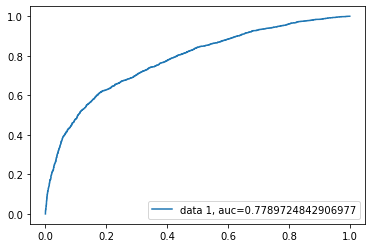

In [175]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Evaluating the models

In [178]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [179]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [180]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.823095,0.818889,0.354596,0.671741,0.464168
1,SVC,0.831194,0.818283,0.355251,0.667811,0.463785
2,Random Forest CLf,0.851443,0.816667,0.338813,0.669071,0.449833
3,Xgboost Clf,0.827662,0.817879,0.354795,0.665810,0.462913
